# Polynomial Regression

**Importing Necessary Files**

In [1]:
#importing libraries
import numpy as np
import pandas as pd 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

**Task 1: Import the 'Boston.csv' data file**

In [3]:
# write code here
data=pd.read_csv('Boston.csv')

**Task 2: Make a copy of data in 'df'**

In [4]:
# Write code here
df = data.copy()

**Task 3: Display top 5 rows of data**

In [5]:
# Write code here
df.head()

,Crime Rate,Residential Proportion,non-retail business acres/Town,Charles River,NO2 concentration,Average Rooms/Dwelling.,Prior Built Units Proportion,Distance to Employment Centres,Radial Highways Distance,ValueProperty/tax rate,Teacher/town,blacks/town,Lower Status Percent,median home price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Creating Independent and Dependent Variables

**Task 4: Create Independent and Dependent variables in 'X' and 'Y' and print their respective shapes.**

In [6]:
# Write code here
X = df.drop(['median home price'], axis=1)
Y = df[['median home price']]
print(X.shape)
print(Y.shape)


(506, 13)
(506, 1)


In [7]:
Z=X.columns
columnss=[Z]
columnss

[Index(['Crime Rate', 'Residential Proportion',
        'non-retail business acres/Town', 'Charles River', 'NO2 concentration',
        'Average Rooms/Dwelling.', 'Prior Built Units Proportion',
        'Distance to Employment Centres', 'Radial Highways Distance',
        'ValueProperty/tax rate', 'Teacher/town', 'blacks/town',
        'Lower Status Percent'],
       dtype='object')]

### Normalizing Data

**Task 5: Normalize the data by applying MinMax Scaling on X.**

In [8]:
# Write code here
import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler
Scaling_Object = MinMaxScaler()
Scaled_Object = Scaling_Object.fit_transform(X)
X=pd.DataFrame(Scaled_Object,columns=columnss) # or X.columns
X.head()

,Crime Rate,Residential Proportion,non-retail business acres/Town,Charles River,NO2 concentration,Average Rooms/Dwelling.,Prior Built Units Proportion,Distance to Employment Centres,Radial Highways Distance,ValueProperty/tax rate,Teacher/town,blacks/town,Lower Status Percent
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338


### Splitting Data

**Task 6: Split the data into training and testing set and print their shapes.**

In [9]:
# Write code here
from sklearn.model_selection import train_test_split
xtrain ,xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.30, random_state=25, shuffle=True)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(354, 13) (354, 1)
(152, 13) (152, 1)


### Applying Linear Regression

**Task 7: Apply Linear Regression on the data.**

In [10]:
# Write the code here
from sklearn.linear_model import LinearRegression
model = LinearRegression()

Apply the fit() function on the model

In [11]:
# Write code here
model.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Get the predicted values on training data set in train_pred

In [12]:
# Write code here
train_pred = model.predict(xtrain)

Get the predicted values on test data set in test_pred

In [13]:
# Write code here
test_pred= model.predict(xtest)

### Finding R2 Score

**Task 8: Find out r2 Score for training and testing data.**

In [14]:
# Write code here for testing data
from sklearn.metrics import r2_score
r2_test_lr= r2_score(ytest,test_pred)


In [15]:
# Write code here for training data
r2_train_lr= r2_score(ytrain,train_pred)


In [16]:
print('R2 score for testing:',r2_test_lr)
print('R2 score for training:',r2_train_lr)

R2 score for testing: 0.7133593313710358
R2 score for training: 0.7435787589010061


**Ploting Residual Plot**

In [17]:
#!pip install yellowbrick

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


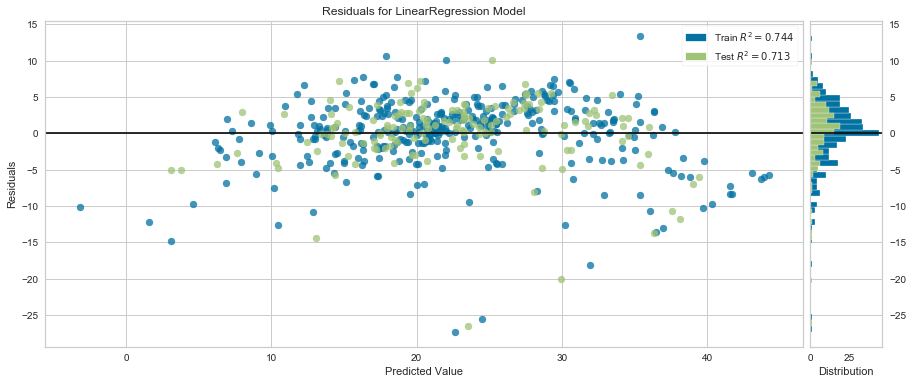

In [18]:
from yellowbrick.regressor import ResidualsPlot

plt.figure(figsize=(15,6))
visualizer = ResidualsPlot(model)
visualizer.fit(xtrain.values, ytrain.values)  
visualizer.score(xtest.values, ytest.values)  
visualizer.poof()    

# Applying Polynomial Regression 

In [19]:
from sklearn.preprocessing import PolynomialFeatures

In [20]:
poly_features = PolynomialFeatures(degree=2)

In [21]:
# transform the features to higher degree features.
X_train_poly = poly_features.fit_transform(xtrain)

In [22]:
# fit the transformed features to Linear Regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
# predicting on training data-set
x_train_predictions = poly_model.predict(X_train_poly)

In [24]:
# predicting on test data-set
X_test_poly=poly_features.fit_transform(xtest)
x_test_predictions = poly_model.predict(X_test_poly)

In [25]:
# evaluating the model on training dataset
r2_train = r2_score(ytrain, x_train_predictions)

In [26]:
# evaluating the model on test dataset
r2_test = r2_score(ytest, x_test_predictions)

In [27]:
print ('The r2 score for training set is: ',r2_train)
print ('The r2 score for testing set is: ',r2_test)

The r2 score for training set is:  0.9322525327409263
The r2 score for testing set is:  0.8194893868475548


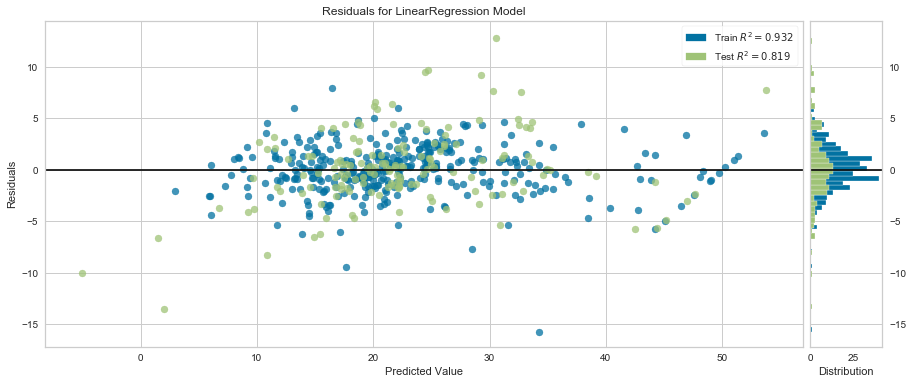

In [28]:
from yellowbrick.regressor import ResidualsPlot

plt.figure(figsize=(15,6))
visualizer = ResidualsPlot(poly_model)
visualizer.fit(X_train_poly, ytrain.values)  
visualizer.score(X_test_poly, ytest.values)  
visualizer.poof()    

# Model Complexity vs Performance

In [61]:
from sklearn.metrics import mean_squared_error
mse_train=[]
mse_test=[]
r2_train=[]
r2_test=[]
for i in range(1,8):
    poly_reg = PolynomialFeatures(degree=i)
    
    X_tr_poly,X_tst_poly = poly_reg.fit_transform(xtrain), poly_reg.fit_transform(xtest)
    
    poly = LinearRegression()
    poly.fit(X_tr_poly, ytrain)
   
    y_tr_predicted, y_tst_predict = poly.predict(X_tr_poly), poly.predict(X_tst_poly)
   
    r2_train.append(r2_score(ytrain, y_tr_predicted))
    r2_test.append(r2_score(ytest, y_tst_predict))
    
    mse_train.append(mean_squared_error(ytrain, y_tr_predicted))
    mse_test.append(mean_squared_error(ytest, y_tst_predict))


### Comparison of R2 Score

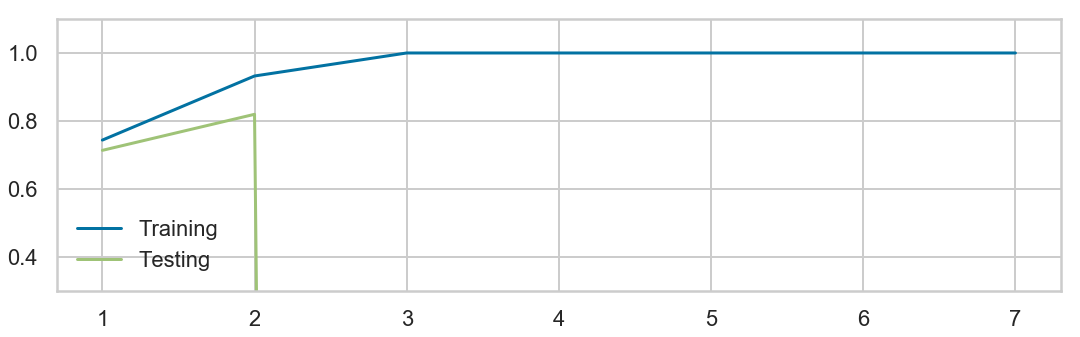

In [40]:
plt.figure(figsize=(18,5))
sns.set_context('poster')
#plt.subplot(1,2,1)
sns.lineplot(x=list(range(1,8)), y=r2_train, label='Training')
#plt.subplot(1,2,2)
sns.lineplot(x=list(range(1,8)), y=r2_test, label='Testing')
plt.ylim(0.3, 1.1)
plt.show()

### Comparison of Mean Squared Error

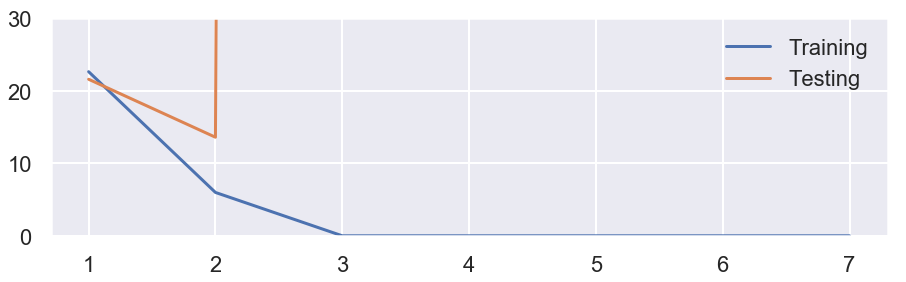

In [65]:
plt.figure(figsize=(15,4))
#plt.subplot(1,2,1)
sns.lineplot(x=list(range(1,8)), y=mse_train, label='Training')
#plt.subplot(1,2,2)
sns.lineplot(x=list(range(1,8)), y=mse_test, label='Testing')
plt.ylim(0, 30)
plt.show()